In [24]:
import numpy as np
import pandas as pd

In [25]:
df=pd.read_csv('stock.csv')

# Learning about data

In [26]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [27]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [28]:
df['Date']=pd.to_datetime(df['Date'])

In [29]:
df=df.sort_values(by='Date',ascending=True)
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [30]:
print("size= ",df.size)  #size of df
print("dimensions= ",df.shape)  #dimensions of df
print(df.dtypes) #datatypes of each feature

size=  16280
dimensions=  (2035, 8)
Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity             int64
Turnover (Lacs)                float64
dtype: object


In [31]:
list(df.columns)

['Date',
 'Open',
 'High',
 'Low',
 'Last',
 'Close',
 'Total Trade Quantity',
 'Turnover (Lacs)']

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 2034 to 0
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 143.1 KB


In [33]:
# checking null values
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [34]:
df.drop(columns={'Total Trade Quantity','Turnover (Lacs)'},inplace=True)

In [35]:
df.describe()

,Open,High,Low,Last,Close
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000
mean,149.713735,151.992826,147.293931,149.474251,149.45027
std,48.664509,49.413109,47.931958,48.732570,48.71204
min,81.100000,82.800000,80.000000,81.000000,80.95000
25%,120.025000,122.100000,118.300000,120.075000,120.05000
50%,141.500000,143.400000,139.600000,141.100000,141.25000
75%,157.175000,159.400000,155.150000,156.925000,156.90000
max,327.700000,328.750000,321.650000,325.950000,325.75000


In [36]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=df['Date'],y=df['Open'],mode='lines',name='Open' ))
fig.add_trace(go.Scatter(
    x=df['Date'],y=df['Close'],mode='lines',name='Close' ))
fig.add_trace(go.Scatter(
    x=df['Date'],y=df['Low'],mode='lines',name='Low' ))
fig.add_trace(go.Scatter(
    x=df['Date'],y=df['High'],mode='lines',name='High' ))
fig.update_layout(
    title='Stock Price Analysis',
    xaxis_title='Date',
    yaxis_title='Value',
    xaxis_rangeslider_visible=True 
)
fig.show()


In [37]:
fig=go.Figure()

fig.add_trace(go.Candlestick(x=df['Date'],open=df['Open'],high=df['High'],low=df['Low'],close=df['Close']))
# Updating layout
fig.update_layout(
    title='Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_white',
    xaxis_rangeslider_visible=True
)
fig.show()

In [40]:
correlation=df.corr()
print(correlation)

           Open      High       Low      Last     Close
Open   1.000000  0.999015  0.998825  0.997781  0.997840
High   0.999015  1.000000  0.998773  0.999155  0.999194
Low    0.998825  0.998773  1.000000  0.999051  0.999119
Last   0.997781  0.999155  0.999051  1.000000  0.999961
Close  0.997840  0.999194  0.999119  0.999961  1.000000


C:\Users\Sakshi\AppData\Local\Temp\ipykernel_14880\215889079.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [41]:
correlation['Close'].sort_values(ascending=False)

Close    1.000000
Last     0.999961
High     0.999194
Low      0.999119
Open     0.997840
Name: Close, dtype: float64

In [12]:
df2=df.reset_index()['Close']
print("shape = ",df2.shape)
df2

shape =  (2035,)


0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

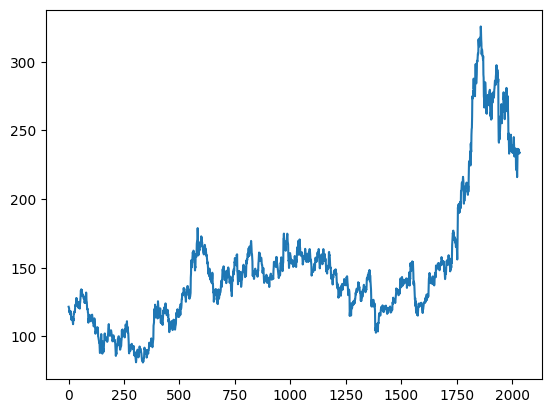

In [13]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1)) #by this all the closing price values will be transformed between 0 t0 1
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [15]:
print("shape = ",df2.shape)
print(df2)

shape =  (2035, 1)
[[0.16584967]
 [0.16319444]
 [0.1621732 ]
 ...
 [0.62622549]
 [0.62214052]
 [0.62418301]]


- splitting data into training and testing dataset

In [16]:
train=int(len(df2)*.65) #65% is train size
test=len(df2)-train #35% is test size
train_data,test_data=df2[0:train,:],df2[train:len(df2),:1]

In [17]:
train,test

(1322, 713)

In [18]:
train_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.19546569],
       [0.18280229],
       [0.19178922]])

In [19]:
test_data

array([[0.19219771],
       [0.19281046],
       [0.21058007],
       [0.19526144],
       [0.20404412],
       [0.21589052],
       [0.2124183 ],
       [0.21813725],
       [0.22058824],
       [0.22875817],
       [0.23120915],
       [0.22589869],
       [0.22569444],
       [0.22038399],
       [0.21527778],
       [0.22222222],
       [0.22079248],
       [0.20915033],
       [0.22201797],
       [0.21343954],
       [0.21813725],
       [0.21609477],
       [0.22712418],
       [0.25020425],
       [0.24897876],
       [0.25306373],
       [0.24611928],
       [0.24938725],
       [0.26082516],
       [0.25776144],
       [0.24897876],
       [0.26715686],
       [0.26654412],
       [0.26736111],
       [0.2563317 ],
       [0.2753268 ],
       [0.2626634 ],
       [0.24142157],
       [0.25939542],
       [0.24897876],
       [0.23917484],
       [0.22324346],
       [0.21691176],
       [0.1942402 ],
       [0.16707516],
       [0.18566176],
       [0.16993464],
       [0.166

In [20]:
def create_dataset(dataset,time_step=1):
    X,Y=[],[] #X represents the input sequences, and Y represents the corresponding target values.
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        #i=0 0,1,2,3,4,....99(X)   100(Y)
        #i=1 1,2,3.........100     101
        X.append(a)
        Y.append(dataset[i+time_step,0])
    return np.array(X),np.array(Y)

In [21]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [22]:
print(X_train.shape)
print(y_train.shape)

(1221, 100)
(1221,)


In [23]:
print(X_test.shape)
print(y_test.shape)

(612, 100)
(612,)


In [24]:
# reshaping dataset to 3 dimensions: samples,timesteps,features
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 7s 161ms/step - loss: 0.0094 - val_loss: 0.0095
Epoch 2/100
20/20 [==============================] - 2s 105ms/step - loss: 0.0019 - val_loss: 0.0040
Epoch 3/100
20/20 [==============================] - 2s 113ms/step - loss: 9.5437e-04 - val_loss: 0.0039
Epoch 4/100
20/20 [==============================] - 2s 123ms/step - loss: 8.3841e-04 - val_loss: 0.0027
Epoch 5/100
20/20 [==============================] - 2s 121ms/step - loss: 8.2888e-04 - val_loss: 0.0042
Epoch 6/100
20/20 [==============================] - 3s 144ms/step - loss: 7.7630e-04 - val_loss: 0.0032
Epoch 7/100
20/20 [==============================] - 3s 155ms/step - loss: 7.7079e-04 - val_loss: 0.0036
Epoch 8/100
20/20 [==============================] - 3s 160ms/step - loss: 7.3577e-04 - val_loss: 0.0039
Epoch 9/100
20/20 [==============================] - 3s 151ms/step - loss: 7.2463e-04 - val_loss: 0.0031
Epoch 10/100
20/20 [==============================] - 3s 144ms/

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.12.0-rc0'

In [31]:
# let's check performance metric and do the predictions
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

20/20 [==============================] - 0s 21ms/step


In [32]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
# calculate rmse performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

134.66554810786232

In [34]:
math.sqrt(mean_squared_error(y_test,test_predict))

197.1024034410221

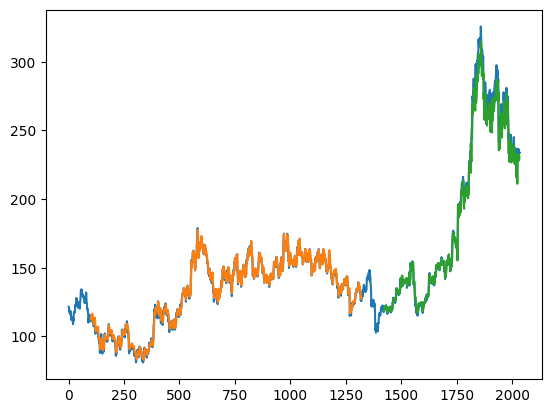

In [35]:
look_back=100
trainPredictPlot=np.empty_like(df2)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict

testPredictPlot=np.empty_like(df2)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :]=test_predict

plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()